In [326]:
#workhorses
import numpy as np
import pandas as pd

#for custom colormaps
from matplotlib.colors import LinearSegmentedColormap

In [327]:
#plotting things

#%matplotlib qt5 -- I don't know what this is
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from cycler import cycler


#All of Anandh's customized seaborn/matplotlib settings

sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

#%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')

    #If you want to use a different font
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 
#                  'serif': ['Helvetica']})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(9,8))

# Generate a facetgrid for all the wells showing just OD

## get data

In [328]:
directory = 'Z:/Reed/Projects/micro_consortia/DARPA_biocon/Task 1.1/A=B/20190214 A=B mar cfp yfp small screen 1/'

filename = '20190214 A=B mar 1.xlsx'

In [329]:
dd = pd.read_excel(directory + filename, sheet_name=None)

In [330]:
dd.keys()

odict_keys(['OD700_raw', 'CFP_raw', 'YFP_raw', 'OD700', 'CFP', 'YFP', 'OD700_tidy', 'CFP_tidy', 'YFP_tidy', 'IDs', 'Exp'])

In [331]:
sheets_to_plot = [x for x in dd.keys() if '_tidy' in x]

In [332]:
sheets_to_plot

['OD700_tidy', 'CFP_tidy', 'YFP_tidy']

## make relevant indices

In [333]:
#which data are we plotting
data = sheets_to_plot[0]

In [334]:
#get the control ones
ctrl = dd[data]['a'] == 'ctrl'

#get the media blank ones
med = dd[data]['a'] == 'lb'

#get the ones without a and b cells
no_a = dd[data]['a'] == 'x'
no_b = dd[data]['b'] == 'x'

#now all the mixes should be accessible by asking for 
#NOT the no a and b indices and NOT the ctrl and med indices

mix = ~no_a & ~no_b & ~ctrl & ~med

In [335]:
np.unique(dd[data].loc[mix, 'b'])

array(['b7', 'b8'], dtype=object)

## access and format the data

In [336]:
df = dd[data].loc[mix]

#having an issue where fluor values are being read as "object" rather than numbers
df.loc[:,'value'] = df.loc[:, 'value'].astype(float)

C:\Users\geeze\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [337]:
all_sal_conc = np.unique(df['sal'])
all_iptg_conc = np.unique(df['iptg'])

all_ind_pairs = [str(i) + ', ' + str(s) for i, s in zip(all_iptg_conc, all_sal_conc)]

In [338]:
###get relevant info for color mapping

#what are the unique inducer conditions you want to make diff colors
ind_concs = np.unique(df['iptg'])
ind_labels = all_ind_pairs

#create a list of values from x-1 of same length as unique inducer concs
#this gets fed to the cmap to get rgb colors
mapping_list = np.linspace(0.37,1,len(ind_concs))

###get some colors that cover all the inducer conditions

#select your color map
cmap = mpl.cm.get_cmap('PuRd')

#create a list of rgb tuples
clist = [cmap(x) for x in mapping_list]

#create the palette dictionary for the facegrit function
pal = {conc : color for conc,color in zip(ind_concs, clist)}

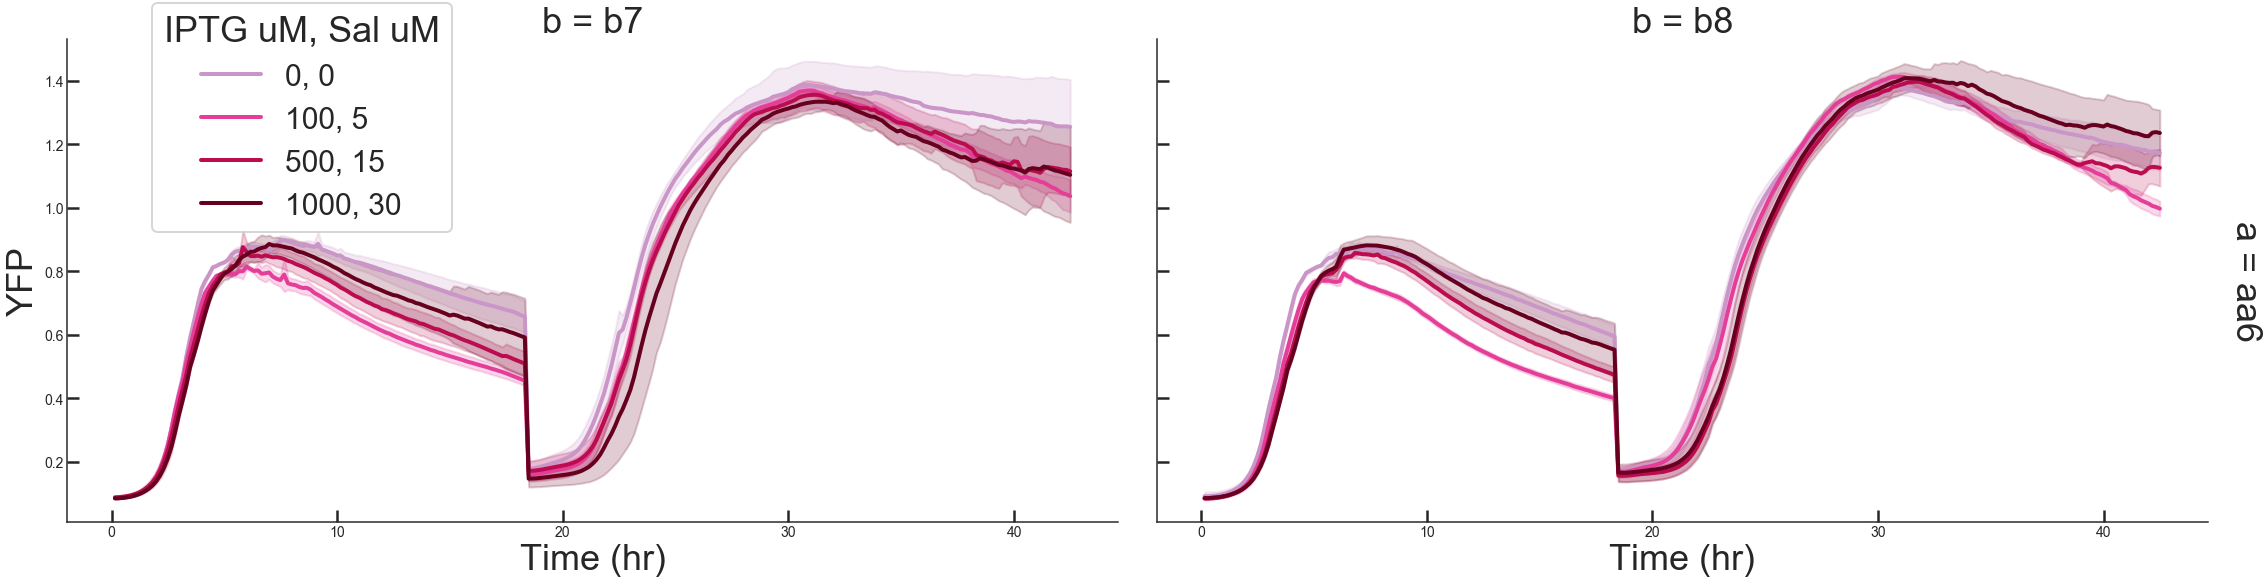

In [339]:
g = sns.FacetGrid(df, col='b', row='a', hue='iptg', palette=pal,
                  height=9, aspect=1.8, margin_titles=True, legend_out=False)


g.map(sns.lineplot, "Time", "value", ci='sd', linewidth=4)

g.fig.legend(labels=ind_labels, title='IPTG uM, Sal uM', fontsize='small', loc='upper right', bbox_to_anchor=(0.2, 0.92))

g.set_titles("{col_name}")
g.set_axis_labels('Time (hr)', "YFP")

In [340]:
g.savefig(directory + 'allABcombos_grad_od2.pdf')

# Make a facet grid of plots in CFP/YFP space

## get data

In [341]:
directory = 'Z:/Reed/Projects/micro_consortia/DARPA_biocon/Task 1.1/A=B/20190214 A=B mar cfp yfp small screen 1/'

filename = '20190214 A=B mar 1.xlsx'

In [342]:
dd = pd.read_excel(directory + filename, sheet_name=None)

In [343]:
dd.keys()

odict_keys(['OD700_raw', 'CFP_raw', 'YFP_raw', 'OD700', 'CFP', 'YFP', 'OD700_tidy', 'CFP_tidy', 'YFP_tidy', 'IDs', 'Exp'])

In [344]:
sheets_to_plot = [x for x in dd.keys() if '_tidy' in x]

In [345]:
sheets_to_plot

['OD700_tidy', 'CFP_tidy', 'YFP_tidy']

## create data sheet with all the CFP and YFP data

In [346]:
#which data are we plotting

#1 is cfp, 2 is yfp
c_name = sheets_to_plot[1]
y_name = sheets_to_plot[2]

c = dd[c_name]
y = dd[y_name]

In [347]:
#sort the data so theyre in the right order
c=c.sort_values(by=['well', 'Time']).rename({'value' : 'cfp'}, axis='columns')
y=y.sort_values(by=['well', 'Time']).rename({'value' : 'yfp'}, axis='columns')

#set one of the time columns to the other
y['Time'] = c['Time']

In [348]:
#merge the dfs, just merge the relevant entries in the fluor df though
both_fluor = c.merge(y, on=['Time', 'well'], how='inner')

#the merge adds duplicate columns with suffixes for columns that exist in both merge df's
#this list removes the ones from the right (fluor_df) df
cols_no_dup = [x for x in both_fluor.columns if '_y' not in x]
both_fluor = both_fluor.loc[:, cols_no_dup]

#now get rid of the left suffixes in the remaining columns
cols_no_suff = [x.strip('_x') for x in both_fluor.columns]
both_fluor.columns = cols_no_suff

In [349]:
### The merge was done successfully, now I have to create a new mapping plotting function to pass to the facetgrid
### to plot the diff concentrations and all that on each facet

### will also want to implement summed fluorescence values and maybe also RFU/OD units

### to finish off the biotek data I think I want to plot OD/CFP/YFP at 0, 18h, 18post dil, 36h as slices
### maybe normalized to the mean fluor/OD of the non-mixed ones to see if the biotek is quantitative enough
### to do pop composition stuff

In [362]:
#slice

#get the control ones
ctrl = both_fluor['a'] == 'ctrl'

#get the media blank ones
med = both_fluor['a'] == 'lb'

#get the ones without a and b cells
no_a = both_fluor['a'] == 'x'
no_b = both_fluor['b'] == 'x'

#now all the mixes should be accessible by asking for 
#NOT the no a and b indices and NOT the ctrl and med indices

mix = ~no_a & ~no_b & ~ctrl & ~med


df = both_fluor.loc[mix]

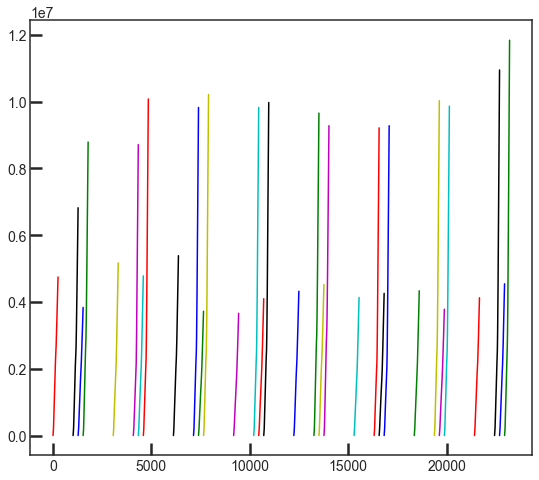

In [381]:
#make cumulative fluor by well

for well in np.unique(df['well']):
    i = df['well'] == well
    
    df.loc[i].sort_values('Time').loc[:, 'cfp'].cumsum().plot()

In [368]:
def scatter_sizes (x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")

    sns.lineplot(x=x, y=y, data=data, ax=ax, hue='iptg', ci='sd')

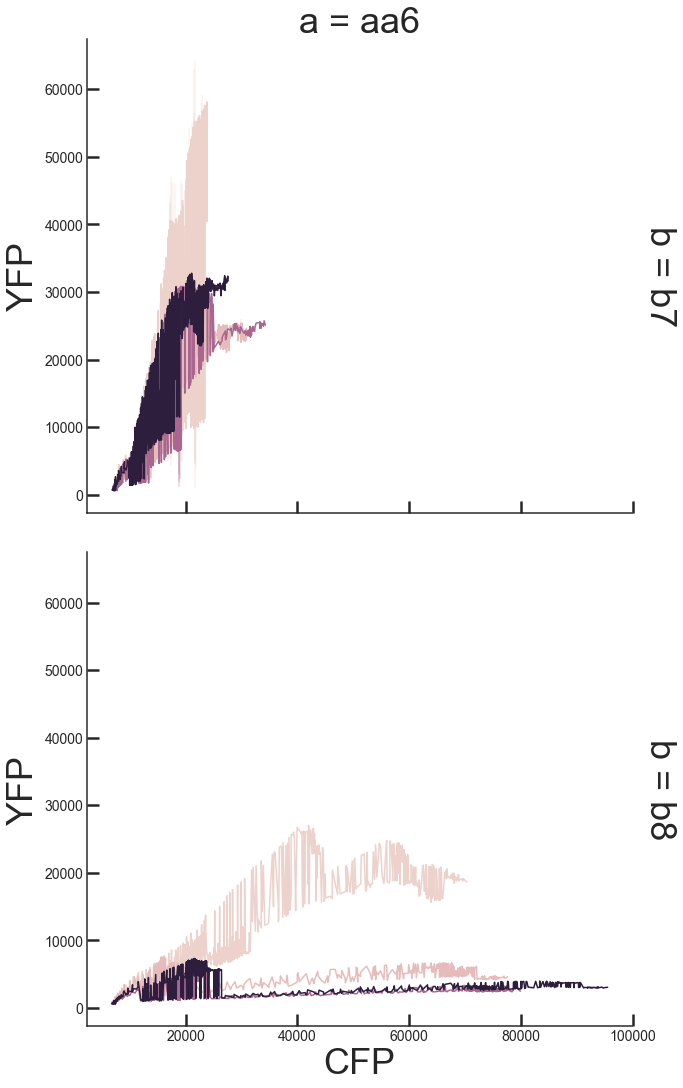

In [370]:
g = sns.FacetGrid(df, col="a", row ="b", palette=pal,
                  height=8, aspect=1.3, margin_titles=True, legend_out=True)


g.map_dataframe(scatter_sizes, "cfp", "yfp")

g.set_axis_labels('CFP', "YFP")

In [371]:
g.savefig(directory + 'both_fluor_scatter.pdf')